# <span style="color:red">Solutions to Homework 6<span>

## Financial Analytics

### UChicago ADSP

#### Spring 2024
* Mark Hendricks
* hendricks@uchicago.edu

## 1 Amazon's Option Chain

Use the data in `data/option_data_AMZN.xlsx`.

### 1.1

Use the data in the sheet `market data` to get
*  `AMZN` share price, $S$
* the risk-free rate, $r$
* the current date, $t$
* the expiration date, $T$

Use the following:
* `AMZN` does not pay dividends.
* time-to-expiration, $\tau$, can be rounded to be exactly one month, `1/12`.

Use either the `expirations` tab, using the `2024-05-31` expiration row to get prices of calls and puts struck at `170`.

(Alternatively, get the call and put prices from the `call chain` and `put chain` tabs. These are for expiration `2024-05-31` and shows prices across strikes. Choose strike `170`.)

Report
* $c-p$
* $S-K$
* $S-Ke^{-r\tau}$

Does put-call parity hold?


### 1.2
Suppose that we know the option won't be exercised early. Then put-call parity compares $c-p$ to $S-Ke^{-r\tau}$.

Using this comparison, describe how you could trade the difference. Be specific.


### 1.3

Chart the strike (horizontal axis) against the implied volatility (vertical axis) as indicated by the `2024-05-31` options reported in `call chain` and `put chain`.

Comment on what you observe.

### 1.4

Calculate the implied volatility of the `2024-05-31` calls and puts, both struck at `170`. 

How does this compare to the reported implied volatilities provided in the data?

### 1.5

For the `2024-05-31` call struck at `170`, report the following:
* delta
* gamma
* theta

### 1.6
Suppose you hold options expiring `2024-05-31`...
* 2 puts struck at `145`
* 2 calls struck at `215`

Plot the price of `AMZN` versus the final NET payoff of these options. 
* The net payoff will subtract the cost of buying the options.

Someone holding this position is hoping for what kind of `AMZN` movement?

***

# <span style="color:red">Solutions</span>

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from options import *

## <span style="color:red">Load Data</span>

In [2]:
LOADFILE = '../data/option_data_AMZN.xlsx'

SHEET = 'market data'

mkt = pd.read_excel(LOADFILE,sheet_name=SHEET)
mkt = mkt.rename(columns={'Unnamed: 0':''}).set_index('')
mkt

,data
,
ticker,AMZN
equity price,180.049896
Tbill,0.0534
date,2024-05-01
option expiration,2024-05-31


In [3]:
SHEET = 'call chain'
calls = pd.read_excel(LOADFILE,sheet_name=SHEET).set_index('contractSymbol')
calls

,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
contractSymbol,,,,,,,,,,,,,
AMZN240531C00170000,2024-05-01 18:06:04,170,11.90,11.80,12.00,-1.100000,-8.461541,209,276,0.274665,True,REGULAR,USD
AMZN240531C00175000,2024-05-01 18:09:30,175,8.43,8.30,8.50,-2.519999,-23.013695,108,636,0.271858,True,REGULAR,USD
AMZN240531C00180000,2024-05-01 18:00:14,180,5.50,5.55,5.70,-2.350000,-29.936304,1266,2282,0.270881,True,REGULAR,USD
AMZN240531C00185000,2024-05-01 18:10:28,185,3.50,3.45,3.60,-2.400000,-40.677967,879,1348,0.270271,False,REGULAR,USD
AMZN240531C00190000,2024-05-01 18:13:02,190,2.02,1.96,2.07,-2.030000,-50.497510,1007,2115,0.265876,False,REGULAR,USD
AMZN240531C00195000,2024-05-01 17:51:35,195,1.04,1.10,1.15,-2.000000,-65.789474,1832,1996,0.266365,False,REGULAR,USD
AMZN240531C00200000,2024-05-01 18:02:59,200,0.58,0.58,0.63,-1.520000,-72.380960,1438,3399,0.269905,False,REGULAR,USD
AMZN240531C00205000,2024-05-01 18:12:07,205,0.31,0.29,0.33,-1.490000,-82.777780,584,1060,0.272956,False,REGULAR,USD
AMZN240531C00210000,2024-05-01 17:47:35,210,0.13,0.13,0.18,-0.770000,-85.555560,588,1236,0.279304,False,REGULAR,USD


In [4]:
SHEET = 'put chain'
puts = pd.read_excel(LOADFILE,sheet_name=SHEET).set_index('contractSymbol')
puts

,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
contractSymbol,,,,,,,,,,,,,
AMZN240531P00130000,2024-05-01 15:45:48,130,0.05,0.05,0.16,-0.160000,-76.190475,199,161,0.504888,False,REGULAR,USD
AMZN240531P00145000,2024-05-01 16:21:15,145,0.12,0.05,0.18,-0.780000,-85.714290,245,536,0.383307,False,REGULAR,USD
AMZN240531P00150000,2024-05-01 17:55:28,150,0.20,0.20,0.23,-0.970000,-82.905980,465,702,0.346198,False,REGULAR,USD
AMZN240531P00155000,2024-05-01 18:05:37,155,0.33,0.29,0.36,-1.450000,-81.460680,357,4304,0.320808,False,REGULAR,USD
AMZN240531P00160000,2024-05-01 18:11:00,160,0.60,0.55,0.62,-2.400000,-80.000010,2536,933,0.301765,False,REGULAR,USD
AMZN240531P00165000,2024-05-01 18:12:28,165,1.10,1.06,1.13,-3.460000,-76.043950,466,1126,0.289314,False,REGULAR,USD
AMZN240531P00170000,2024-05-01 18:10:52,170,2.00,2.00,2.07,-4.050000,-66.942154,611,1063,0.282966,False,REGULAR,USD
AMZN240531P00180000,2024-05-01 17:37:24,180,6.30,5.65,5.85,-4.639999,-42.413160,236,520,0.281013,False,REGULAR,USD


In [5]:
SHEET = 'expirations'
expirations = pd.read_excel(LOADFILE,sheet_name=SHEET).set_index('expirations')
expirations

,call,put,call ivol,put ivol,strike
expirations,,,,,
2024-05-03,9.44,0.32,0.000010,0.479497,170
2024-05-10,10.30,0.83,0.229500,0.344733,170
2024-05-17,10.58,1.27,0.266609,0.314216,170
2024-05-24,11.35,1.64,0.286262,0.302009,170
2024-05-31,11.90,2.00,0.274665,0.282966,170
2024-06-07,12.27,2.40,0.297614,0.283210,170
2024-06-21,13.47,3.05,0.283454,0.266243,170
2024-07-19,15.21,4.40,0.300361,0.263679,170
2024-08-16,19.08,7.15,0.356757,0.305671,170


## <span style="color:red">Solution 1</span>

There are three price fields: `lastPrice`, `bid`, and `ask`.

Okay to use any of the three or an average of them.

In [6]:
PRICEFLD = 'lastPrice'

STRIKE = 170

### <span style="color:red">1.1</span>

In [7]:
idCall = calls['strike']==STRIKE
c = calls[idCall][PRICEFLD].values[0]

idPut = puts['strike']==STRIKE
p = puts[idPut][PRICEFLD].values[0]

S = mkt.loc['equity price','data']
r = mkt.loc['Tbill','data']

# instructions said welcome to approximate tau=1/12
# if want to calculate it programatically, here it is
t = mkt.loc['date','data']
T = mkt.loc['option expiration','data']

DAYSYEAR = 365.25
days_to_exp = (datetime.datetime.strptime(T,'%Y-%m-%d') - datetime.datetime.strptime(t,'%Y-%m-%d')).days
tau = days_to_exp / DAYSYEAR

In [8]:
putcall = pd.DataFrame([c-p, S-STRIKE, S - STRIKE * np.exp(-r*tau)],index=['c-p','S-K','S-K*'],columns=[''])
putcall.style.format('${:.2f}')

,
c-p,$9.90
S-K,$10.05
S-K*,$10.79


where $K^*$ denotes $Ke^{-r\tau}$.

### <span style="color:red">1.2</span>

We see that the call-put spread is smaller than the share-strike spread.

Thus, we would want to go 
* long the call-minus-put
* short the stock-minus-cash

In other words...
* call minus put plus cash equal to present value of strike price
* short the share of stock

Then
* replicated the share of stock for a price of $c-p+K^*$
* short (immediately receive cash) of $S$

At expiration,
* replicated position exactly matches $S$ no matter what happens to $S$.
* total profit is $S - (c-p+K^*) = S-c+p-K^* = (S-K^*) - (c-p)$

In [9]:
profit = (putcall.loc['S-K*'] - putcall.loc['c-p']).to_frame().rename(columns={0:'pnl'})
profit.style.format('${:.2f}')

,pnl
,$0.89


### <span style="color:red">1.3</span>

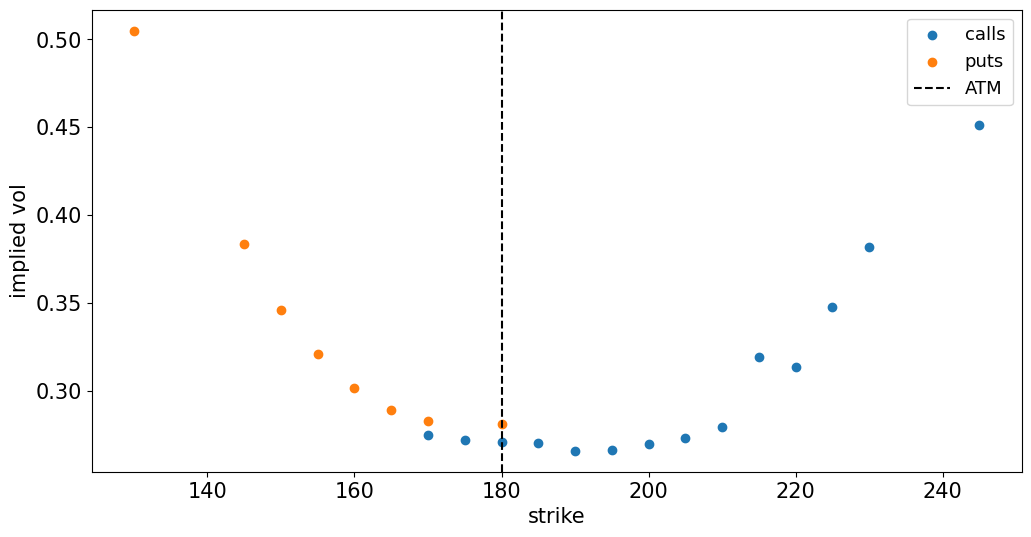

In [10]:
plt.scatter(calls['strike'],calls['impliedVolatility'],label='calls')
plt.scatter(puts['strike'],puts['impliedVolatility'],label='puts')
plt.axvline(x=S, color='black', linestyle='--', label='ATM')
plt.xlabel('strike')
plt.ylabel('implied vol')
plt.legend()
plt.show()

### <span style="color:red">1.4</span>

In [11]:
ivol_quote = calls[idCall]['impliedVolatility'].values[0]
ivol_calc = bs_impvol(S,STRIKE,tau,r,option='call',opt_price=c)[0]
pd.DataFrame([ivol_quote,ivol_calc],index=['quote','estimated'],columns=['implied volatility']).style.format('{:.2%}')

,implied volatility
quote,27.47%
estimated,23.22%


### <span style="color:red">1.5</span>

Calculating the greeks requires using the implied volatility of the option.

As we saw in the previous problem, there is a difference between the quoted and calculated implied volatilities.

Feel free to use either, as the question did not specify.

In [12]:
IVOL = ivol_quote

pd.DataFrame([
    bs_delta(S,STRIKE,tau,r,IVOL),
    bs_gamma(S,STRIKE,tau,r,IVOL),
    bs_theta(S,STRIKE,tau,r,IVOL)],
    index=['delta','gamma','theta'], columns=['greeks']).style.format('{:.4f}')

,greeks
delta,0.7952
gamma,0.0200
theta,-31.4762


### <span style="color:red">1.6</span>

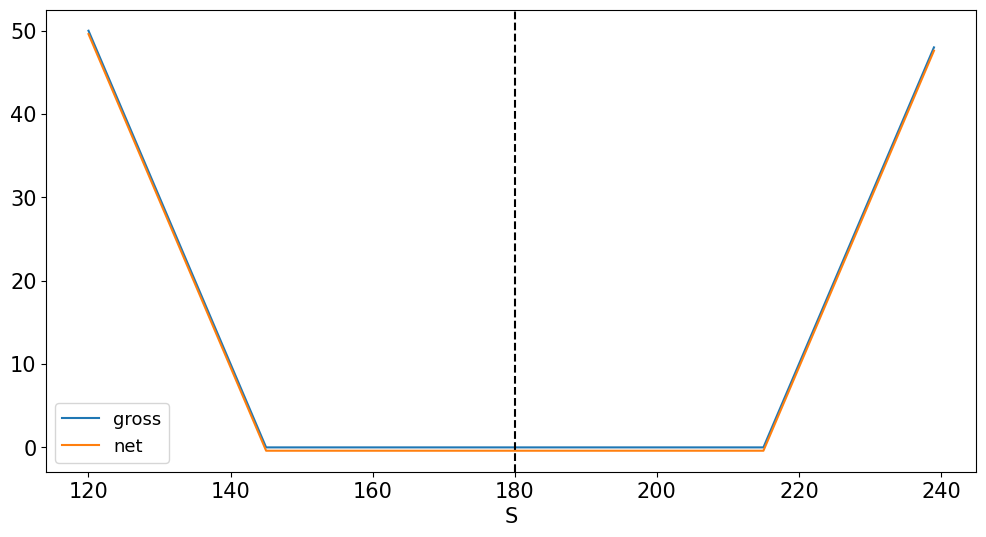

In [13]:
STRIKE_UP = 215
STRIKE_DOWN = 145
Nc = 2
Np = 2

c_up = calls[calls['strike']==STRIKE_UP][PRICEFLD].values[0]
p_down = puts[puts['strike']==STRIKE_DOWN][PRICEFLD].values[0]

stock_values = range(round(S*2/3), round(S*4/3))

df = pd.DataFrame({'S': stock_values})
df['gross'] = Nc * np.maximum(df['S']-STRIKE_UP,0) + Np * np.maximum(STRIKE_DOWN-df['S'],0)
df['net'] = df['gross'] - Nc * c_up - Np * p_down
df = df.set_index('S')

ax = df.plot()
plt.axvline(x=S, color='black', linestyle='--', label='Stock')
plt.show()

In [14]:
payoff_min = df['net'].min()
display(f'The net payoff if the stock stays between the two strikes is ${payoff_min:.2f}.')

'The net payoff if the stock stays between the two strikes is $-0.40.'

The strategy is betting on the stock having a big movement, as it will otherwise lose a small amount.